# 📊 Sales Data Cleaning & Visualization


In [ ]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
import pandas as pd


df = pd.read_csv("/content/superstore_500.csv")
df.head()

,OrderID,OrderDate,Region,Category,Product,Sales,Quantity
0,1,2023-04-13,West,Technology,Laptop,1420,9
1,2,2024-03-11,South,Technology,Desk,1540,1
2,3,2023-12-15,South,Office Supplies,Pens,1290,1
3,4,2023-09-28,West,Furniture,Paper,579,1
4,5,2023-04-17,West,Furniture,Tablet,1925,3


In [ ]:
# 3. Quick Data Overview
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OrderID    500 non-null    int64 
 1   OrderDate  500 non-null    object
 2   Region     500 non-null    object
 3   Category   500 non-null    object
 4   Product    500 non-null    object
 5   Sales      500 non-null    int64 
 6   Quantity   500 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 27.5+ KB
None


,OrderID,Sales,Quantity
count,500.000000,500.000000,500.000000
mean,250.500000,1034.874000,4.998000
std,144.481833,572.348243,2.515283
min,1.000000,11.000000,1.000000
25%,125.750000,535.750000,3.000000
50%,250.500000,1042.000000,5.000000
75%,375.250000,1531.250000,7.000000
max,500.000000,1999.000000,9.000000


In [ ]:
# 4. Data Cleaning
df = df.drop_duplicates()
df = df.dropna()
print("Dataset after cleaning:", df.shape)

Dataset after cleaning: (500, 7)


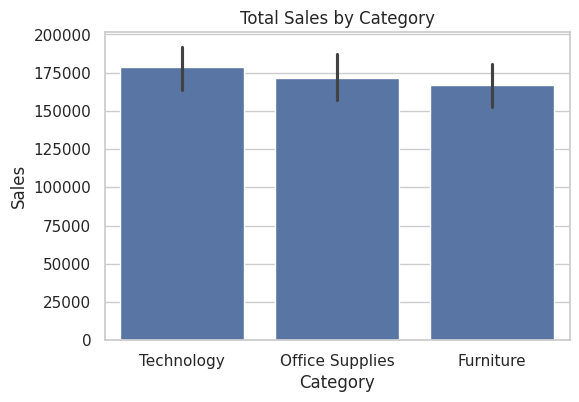

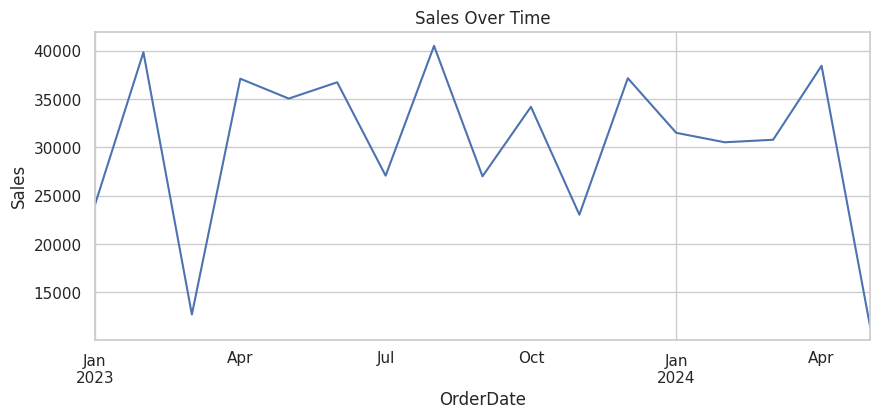

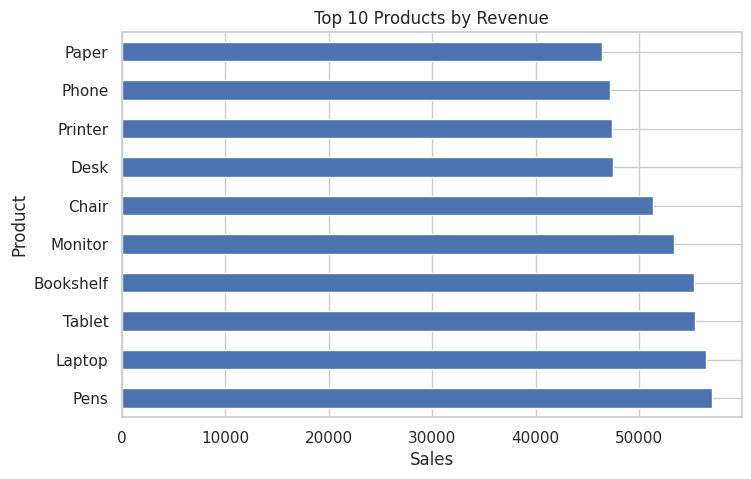

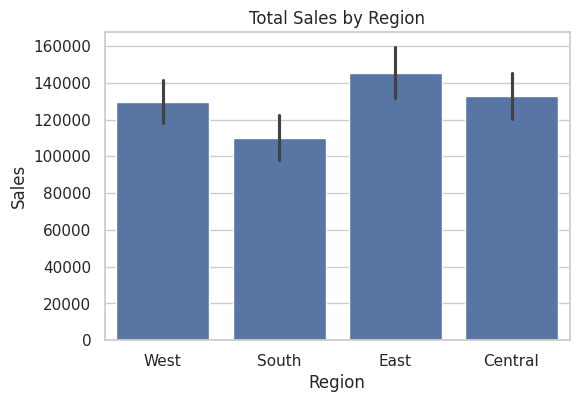

In [ ]:
# 5. Exploratory Data Analysis

# Sales by Category
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Category", y="Sales", estimator=sum)
plt.title("Total Sales by Category")
plt.show()

# Sales Trend Over Time
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
sales_trend = df.groupby(df['OrderDate'].dt.to_period("M")).Sales.sum()
sales_trend.plot(figsize=(10,4), title="Sales Over Time")
plt.ylabel("Sales")
plt.show()

# Top 10 Products by Revenue
top_products = df.groupby('Product').Sales.sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8,5), title="Top 10 Products by Revenue")
plt.xlabel("Sales")
plt.show()

# Sales by Region
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Region", y="Sales", estimator=sum)
plt.title("Total Sales by Region")
plt.show()

## Business Insights
- Technology category generates strong sales, followed by Furniture and Office Supplies.
- Sales trend shows growth in certain months — seasonality may exist.
- A few products drive most of the revenue — potential focus for inventory/marketing.
- Regional sales performance varies — targeting strong regions could maximize revenue.
